## 
COURSEWORK- 345  690380





CONVOLUTIONAL NEURAL NETWORK

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from tensorflow.keras import utils
from tensorflow.keras.layers import MaxPooling2D, LeakyReLU
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout,Activation,BatchNormalization

In [10]:
trainImages = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/trnImage.npy')
trainLabels = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/trnLabel.npy')

testImages = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/tstImage.npy')
testLabels = np.load('/content/drive/MyDrive/Colab Notebooks/datasets/tstLabel.npy')

In [8]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
print(trainImages.shape)
print(trainLabels.shape)
print(testImages.shape)
print(testLabels.shape)

"""
Showing the dimention of the data"""

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)


'\nShowing the dimention of the data'

**Provided** code for extracting the Hog feature


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00709418 0.         ... 0.01711396 0.         0.01825076]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01533205 0.         ... 0.13163584 0.         0.08568367]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00941721 0.         ... 0.03130561 0.         0.02800023]]
The extracted feature vector is of length 15876 per sample


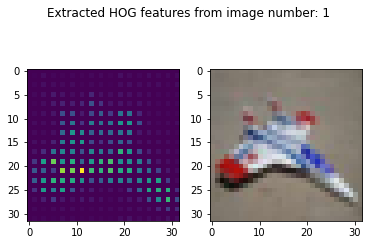

In [13]:
i = 1
image = trainImages[:, :, :, i]
hog_feature, hog_image = skimage.feature.hog(image,orientations=9, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)

print(hog_image)
print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')

plt.figure()
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(image)
plt.suptitle(f'Extracted HOG features from image number: {i}')
plt.show(block=False)

In [14]:

def extractFeatures(trainImagesm,trainTest,steps): 
    shape=trainImagesm.shape
    shapeTest = trainTest.shape

    hog_features=[]
    hog_featureTest=[]

    hog_images=[]
    hog_imagesTest =[]
    print(shape)
    for a in range(0,shape[3],steps):
      image1=trainImagesm[:,:,:, a]
      hog_feature,hog_image =skimage.feature.hog(image1,orientations=9,pixels_per_cell=[2,2],cells_per_block=[3,3], feature_vector=True,visualize=True)
      hog_features.append(hog_feature)
      hog_images.append(hog_image)


      """
      Uncomment to plot
      plt.figure()
      plt.subplot(121)
      plt.imshow(hog_image)
      plt.subplot(122)
      plt.imshow(image1)
      plt.suptitle(f'Extracted HOG features from image number: {a}')
      plt.show(block=False"
      """
      
    

    for a in range(0,shapeTest[3],steps):
      image2=trainTest[:,:,:, a]
      hog_feature2,hog_image2=skimage.feature.hog(image2,orientations=9,pixels_per_cell=[2,2],cells_per_block=[3,3], feature_vector=True,visualize=True)
      hog_featureTest.append(hog_feature2)
      hog_images.append(hog_image2)




    return hog_features, hog_featureTest
    

   
extractFeatures(trainImages,testImages,10000)


(32, 32, 3, 10000)


([array([0.04137112, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ])],
 [array([0.33877531, 0.        , 0.        , ..., 0.14074655, 0.        ,
         0.        ])])

In [15]:
"""
Categorise the data to the categories of the pictures"""
YTrain = utils.to_categorical(trainLabels,10)
YTest = utils.to_categorical(testLabels,10)

In [16]:

"""
Normalise the data
 and conversion to plot

"""
XTrain = trainImages.astype('float32') / 255.0
XTest = testImages.astype('float32') / 255.0

XTrain = XTrain.reshape(XTrain.shape).transpose([3, 1, 0, 2])
XTest = XTest.reshape(XTest.shape).transpose([3, 1, 0, 2])



Model initialising

In [17]:


model = Sequential()
model.add(Flatten(input_shape=[32,32,3])) 
model.add(Dense(256, activation=LeakyReLU(alpha=0.3))) 

model.add(Dropout(0.7)) 
model.add(Dense(256, activation=LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(128, activation=LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation=LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation="softmax"))



"""
model.add(Dense(1024, activation=LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(512, activation=LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu")) 
model.add(Dropout(0.3)"
"""



'\nmodel.add(Dense(1024, activation=LeakyReLU(alpha=0.3))) \nmodel.add(Dropout(0.5)) \nmodel.add(Dense(512, activation=LeakyReLU(alpha=0.3))) \nmodel.add(Dropout(0.3))\nmodel.add(Dense(64, activation="relu")) \nmodel.add(Dropout(0.3)"\n'

In [18]:

model.compile(optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [51]:
history = model.fit(XTrain, YTrain, epochs=2000,batch_size=50,verbose=1,validation_data = (XTest, YTest),initial_epoch= 1500,shuffle=True)

Epoch 1501/2000
200/200 [==============================] - 1s 3ms/step - loss: 1.9064 - accuracy: 0.2952 - val_loss: 1.8934 - val_accuracy: 0.3280
Epoch 1502/2000
200/200 [==============================] - 1s 3ms/step - loss: 1.8966 - accuracy: 0.3010 - val_loss: 1.8940 - val_accuracy: 0.3440
Epoch 1503/2000
200/200 [==============================] - 1s 3ms/step - loss: 1.9027 - accuracy: 0.3011 - val_loss: 1.8877 - val_accuracy: 0.3290
Epoch 1504/2000
200/200 [==============================] - 1s 3ms/step - loss: 1.9011 - accuracy: 0.2972 - val_loss: 1.8875 - val_accuracy: 0.3340
Epoch 1505/2000
200/200 [==============================] - 1s 3ms/step - loss: 1.8966 - accuracy: 0.3028 - val_loss: 1.8870 - val_accuracy: 0.3360
Epoch 1506/2000
200/200 [==============================] - 1s 3ms/step - loss: 1.8999 - accuracy: 0.3032 - val_loss: 1.8929 - val_accuracy: 0.3290
Epoch 1507/2000
200/200 [==============================] - 1s 3ms/step - loss: 1.8985 - accuracy: 0.2965 - val_loss: 1

In [20]:
model.summary()
model.evaluate(XTrain,YTrain)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

[1.8031775951385498, 0.3434999883174896]

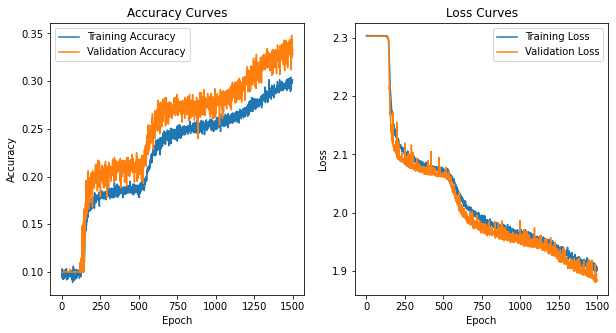

In [21]:


plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()





In [22]:
pred_test = model.predict(XTest)
pred_test_classes = np.argmax(pred_test, axis=1)
test_max_probas = np.max(pred_test, axis=1)

* Image Showing


In [23]:

"""
Method for showing pictures and predictions"""

def showPredictions(col,row,testImages,categoryNames,y_pred_test_max_probas,y_pred_test_classes):
    
    fig = plt.figure(figsize=(2 * col - 1, 3 * row - 1))
    for i in range(col):
        for j in range(row):
            index_rand = np.random.randint(0, len(YTest))
            ax = fig.add_subplot(row, col, i * row + j + 1)
            ax.grid('off')
            ax.axis('off')
            ax.imshow(testImages.reshape(testImages.shape).transpose([3, 1, 0, 2])[index_rand, :])
            
            pred_label =  categoryNames[y_pred_test_classes[index_rand]]
            pred_proba = y_pred_test_max_probas[index_rand]
            true_label = categoryNames[testLabels[index_rand, 0]]
            ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
                  pred_label, pred_proba, true_label
            ))
    plt.show()


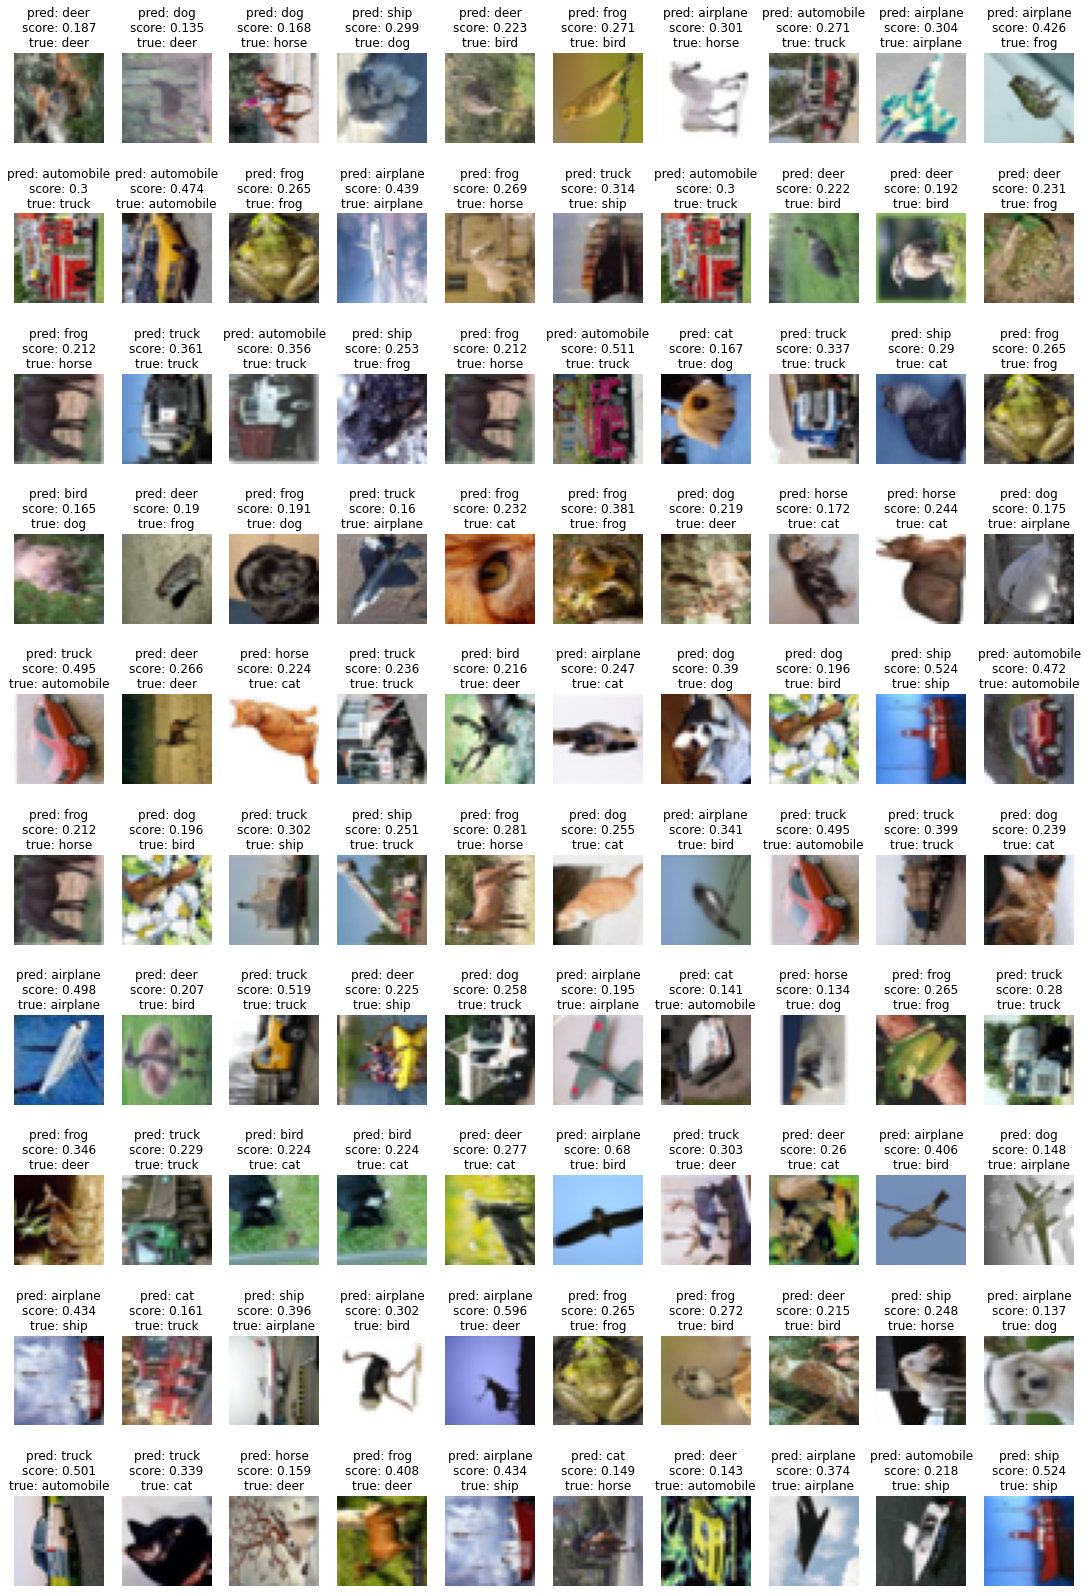

In [24]:
categoryNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
showPredictions(10,10,testImages,categoryNames,test_max_probas,pred_test_classes)



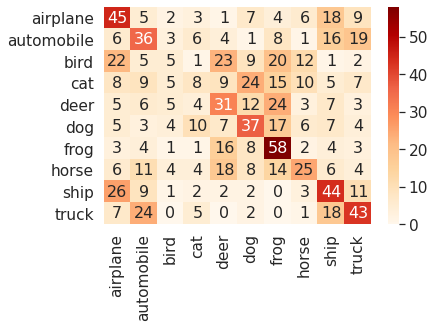

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


Y_pred = model.predict(XTest)
y_pred = np.argmax(Y_pred, axis=1)

array = confusion_matrix(testLabels, y_pred)


"""
Plot confusion matrix"""

df_cm = pd.DataFrame(array, index = [i for i in  categoryNames], columns = [i for i in  categoryNames])
sn.set(font_scale=1.4) 

sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="OrRd") 


plt.show()



**SUPPORT VECTOR MACHINES**

In [26]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd

from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:


from sklearn.decomposition import PCA
steps = 1
hg_features, test_hog = extractFeatures(trainImages,testImages,steps)

pca = PCA(n_components=67)
trainData=pca.fit_transform(np.array(hg_features))
testData=pca.transform(np.array(test_hog))



(32, 32, 3, 10000)


In [28]:


clf = svm.SVC(kernel='rbf', degree=3, C=3, decision_function_shape='ovr')

clf.fit(trainData,trainLabels)





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:

clf.score(testData,testLabels)


0.568

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
predictions = clf.predict(testData)
print("Accuracy",accuracy_score(testLabels,predictions))
print(classification_report(testLabels,predictions))

Accuracy 0.568
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       100
           1       0.73      0.63      0.68       100
           2       0.43      0.37      0.40       100
           3       0.42      0.38      0.40       100
           4       0.46      0.61      0.53       100
           5       0.49      0.45      0.47       100
           6       0.58      0.67      0.62       100
           7       0.71      0.65      0.68       100
           8       0.59      0.62      0.60       100
           9       0.68      0.67      0.68       100

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



Confusion Matrix

1000
(1000, 1)


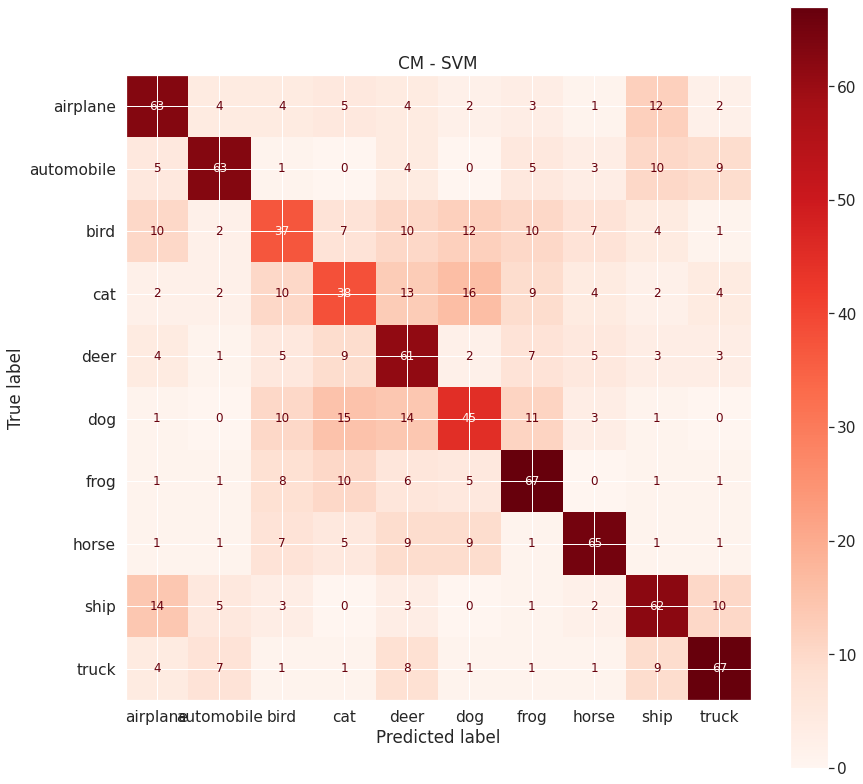

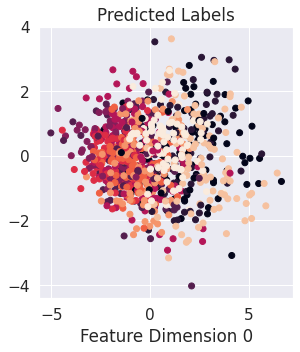

In [50]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


 


print(testLabels.size)
print(testLabels.shape)


"""
Show matrix
"""


fig, ax = plt.subplots(figsize=(14, 14))
matrix = plot_confusion_matrix(clf, testData, testLabels,
                                 cmap=plt.cm.Reds, display_labels = categoryNames,
                                 ax =ax )
plt.title('CM - SVM' )
plt.show(matrix)


plt.figure(figsize=[10,5])
plt.subplot(121)
plt.title('Predicted Labels')
plt.scatter(testData[:,0], testData[:,1], c=predictions)
plt.xlabel('Feature Dimension 0')
plt.show()

